# **Import Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_info=pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')
df=pd.read_csv('lending_club_loan_two.csv')

# **EDA**

In [ ]:
df_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [3]:
print(df_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
df_info.describe()

,Description
count,28
unique,28
top,The monthly payment owed by the borrower if th...
freq,1


In [5]:
def feat_info(x):
  print(df_info.loc[x]['Description'])

feat_info('mort_acc')

Number of mortgage accounts.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [7]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

<AxesSubplot:xlabel='loan_status', ylabel='count'>

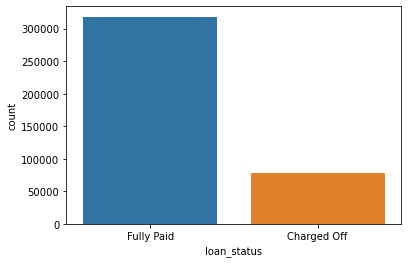

In [8]:
sns.countplot(x='loan_status',data=df)

<AxesSubplot:>

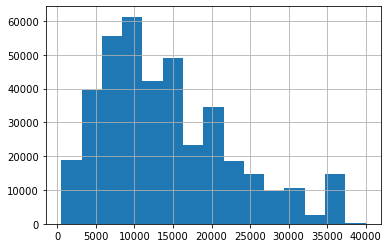

In [9]:
df['loan_amnt'].hist(bins=15)

(12.0, 0.0)

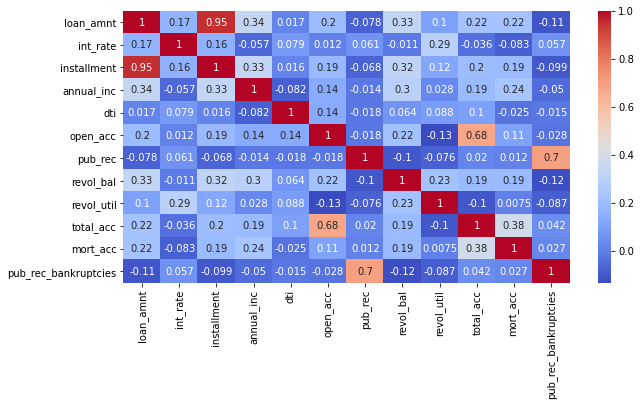

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.ylim(12,0)

Text(0.5, 1.0, 'Best Correlation')

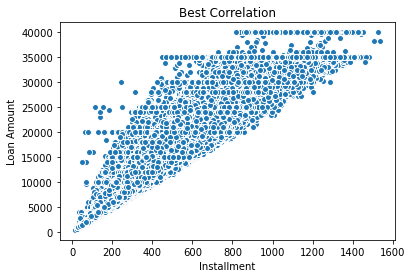

In [11]:
plt.scatter('installment','loan_amnt',data=df,edgecolors='white')
plt.xlabel('Installment')
plt.ylabel('Loan Amount')
plt.title('Best Correlation')

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

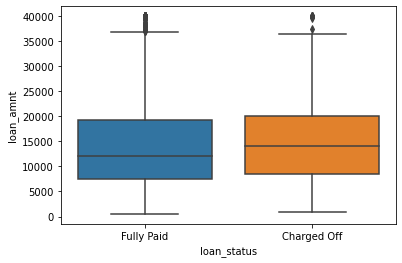

In [12]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [13]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [14]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [15]:
df['sub_grade'].sort_values().unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

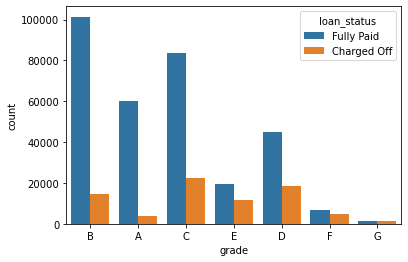

In [16]:
sns.countplot(x='grade',hue='loan_status',data=df)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

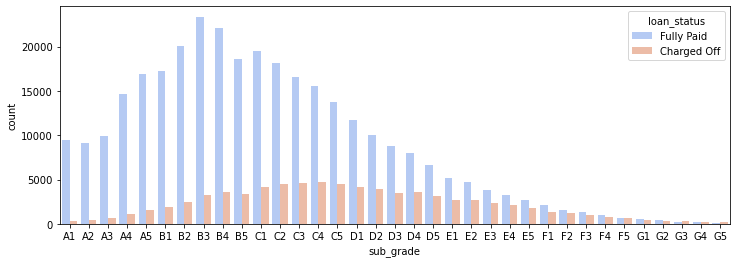

In [17]:
plt.figure(figsize=(12,4))
subgrade_order=df['sub_grade'].sort_values().unique()
sns.countplot(x='sub_grade',data=df,palette='coolwarm',hue='loan_status',order=subgrade_order)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

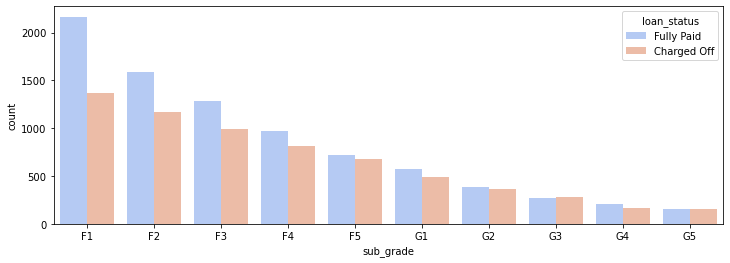

In [18]:
f_and_g=df[(df['grade']=='G')|(df['grade']=='F')]
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=f_and_g,palette='coolwarm',hue='loan_status',
              order=f_and_g['sub_grade'].sort_values().unique())

<AxesSubplot:>

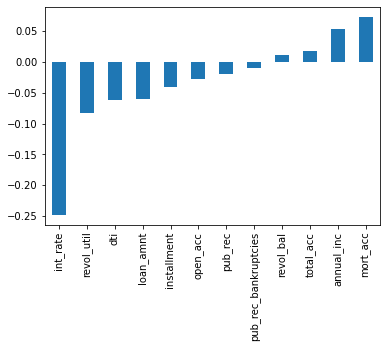

In [19]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [20]:
df['loan_repaid'].describe()

count    396030.000000
mean          0.803871
std           0.397068
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: loan_repaid, dtype: float64

# **Pre-Processing**

#### 1-Missing Data

In [21]:
len(df)

396030

In [22]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [23]:
df['emp_title'].nunique()

173105

###### Realistically there are too many unique job titles to try to convert this feature into  a dummy variable feature. Let's remove this emp_title column. 

In [24]:
df=df.drop('emp_title',axis=1)

In [25]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

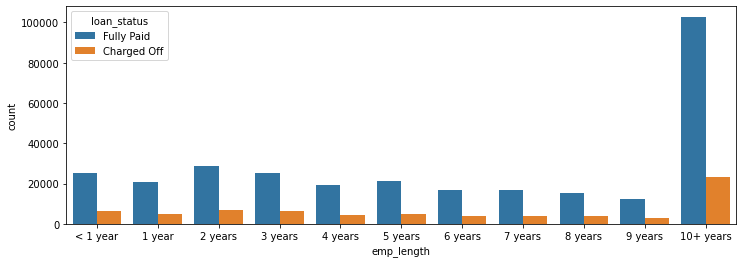

In [26]:
emp_length_order= ['< 1 year' , '1 year','2 years','3 years','4 years','5 years',
 '6 years','7 years','8 years','9 years','10+ years']
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,hue='loan_status',order=emp_length_order)

In [27]:
co=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
fp=df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
E=co/fp
E

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

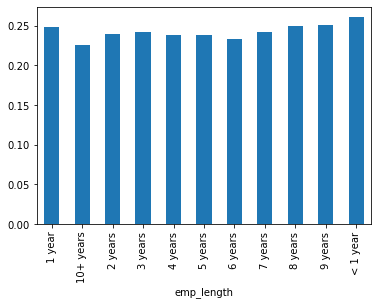

In [28]:
E.plot(kind='bar')

##### Charge Off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.

In [29]:
df=df.drop('emp_length',axis=1)

The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.

In [30]:
df=df.drop('title',axis=1)

In [31]:
feat_info('mort_acc')

Number of mortgage accounts.


<AxesSubplot:>

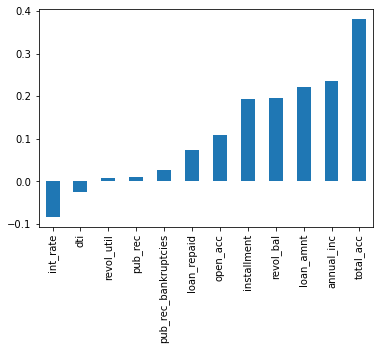

In [32]:
df.corr()['mort_acc'].sort_values().drop('mort_acc').plot(kind='bar')

In [33]:
total_acc_avg=df.groupby('total_acc').mean()['mort_acc']

def fill(total_acc,mort_acc):

  if pd.isnull(mort_acc):
    return total_acc_avg[total_acc]
  else:
    return mort_acc

df['mort_acc']=df.apply(lambda x:fill(x['total_acc'],x['mort_acc']),
                        axis=1)    
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

revol_util and pub_rec_bankruptcies have less that 0.5 % missing data, so we will drop the rows with missing columns.

In [34]:
df=df.dropna()
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

<AxesSubplot:>

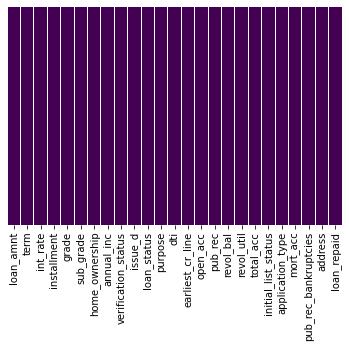

In [35]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
100*df.isnull().sum()/len(df)

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
loan_repaid             0.0
dtype: float64

#### 2- Non-Numeric columns

In [37]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [38]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [39]:
df['term']=df['term'].apply(lambda term: int(term[:3]))

In [40]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

We already know that gradeis a part of sub_grade, so we will just drop the grade feature.

In [41]:
df=df.drop('grade',axis=1)

In [42]:
subgrade_dummies=pd.get_dummies(df['sub_grade'],drop_first=True)
df=pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)
Dummies=pd.get_dummies(df[['verification_status','purpose',
                          'initial_list_status','application_type']],drop_first=True)
df=pd.concat([df.drop(['verification_status','purpose',
                          'initial_list_status','application_type'],axis=1),
              Dummies],axis=1)

In [43]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [44]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [45]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')
dummies2=pd.get_dummies(df['home_ownership'],drop_first=True)
df=pd.concat([df.drop('home_ownership',axis=1),dummies2],axis=1)
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

We have already Converted loan_status object column to loan_repaid float column, so we can drop this column.

In [46]:
df=df.drop('loan_status',axis=1)

In [47]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'earliest_cr_line', 'address'], dtype='object')

In [48]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [49]:
df['zip_code']=df['address'].apply(lambda address:address[-5:])
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [50]:
dummies3=pd.get_dummies(df['zip_code'],drop_first=True)
df=pd.concat([df.drop(['zip_code','address'],axis=1),dummies3],axis=1)
df.select_dtypes(['object']).columns

Index(['issue_d', 'earliest_cr_line'], dtype='object')

issue_d:
This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, So in theory we wouldn't have an issue date. We will Drop this feature.

In [51]:
df=df.drop('issue_d',axis=1)

earliest_cr_line:This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called earliest_cr_year. Then drop the earliest_cr_line feature.

In [52]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [53]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df=df.drop('earliest_cr_line',axis=1)
df.select_dtypes(['object']).columns

Index([], dtype='object')

In [54]:
df['earliest_cr_year'].head()

0    1990
1    2004
2    2007
3    2006
4    1999
Name: earliest_cr_year, dtype: int64

#### 3- Train-Test-Split

In [55]:
from sklearn.model_selection import train_test_split
X=df.drop('loan_repaid',axis=1).values
y=df['loan_repaid'].values
print(len(df))

395219


In [56]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

#### 4- Scaling

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# **Model**

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [59]:
X_train.shape

(316175, 78)

In [60]:
y_train.shape

(316175,)

In [61]:
y_test.shape

(79044,)

In [62]:
X_test.shape

(79044, 78)

In [63]:
model=Sequential()
model.add(Dense(units=78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),epochs=25,batch_size=256)

Epoch 1/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3005 - val_loss: 0.2654
Epoch 2/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2655 - val_loss: 0.2640
Epoch 3/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2632 - val_loss: 0.2623
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2618 - val_loss: 0.2621
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2608 - val_loss: 0.2615
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2604 - val_loss: 0.2624
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2601 - val_loss: 0.2617
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2595 - val_loss: 0.2613
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2593 - val_loss: 0.2612
Epoch 10/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.258

In [64]:
model.save('Loan_Project_Model.h5')

# **Evaluation**

<AxesSubplot:>

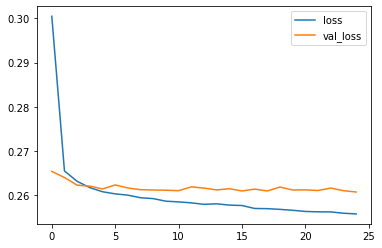

In [65]:
losses=pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [68]:
from sklearn.metrics import classification_report,confusion_matrix
prediction=model.predict_classes(X_test)
print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



[[ 6847  8811]
 [   95 63291]]


In [69]:
import random
random.seed(132)
random_ind=random.randint(65,len(df))
new_customer=df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           10000.00
term                   36.00
int_rate                7.59
installment           311.48
annual_inc          60000.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1982.00
Name: 216749, Length: 78, dtype: float64

In [70]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]])

In [71]:
df.iloc[random_ind]['loan_repaid']

1.0